### Piece Difficulty Estimation Challenge Report
### **Team Yoko Ono** : *Srijan Shakya*, *Sandesh Gurung*

#### Introduction
The Piece Difficulty Estimation Challenge involves determining the difficulty level of musical pieces based on extracted features from their symbolic representations. This task is crucial for applications in music education, automated analysis, and aiding musicians in selecting repertoire. Difficulty estimation poses unique challenges due to the subjective and multifaceted nature of musical complexity, which involves elements like rhythm, pitch, harmony, and coordination.

In this report, we present a baseline approach using extracted features and decision tree models, followed by an improved methodology leveraging enhanced features and a Random Forest classifier. The performance is evaluated using appropriate metrics, and the results are discussed in detail.

#### Dataset
The dataset comprises symbolic music scores labeled with difficulty levels. Key details:
- **Training Data**: Includes labeled scores with difficulty levels.
- **Test Data**: Consists of scores without difficulty labels for prediction.

The dataset comprises musical scores represented using the `partitura` library. These scores are structured to capture both symbolic representations and temporal dynamics of music. The dataset is provided in MusicXML format, which is an XML-based format for encoding musical scores. 

Key features extracted from the dataset include:

- **Note Density**: The average number of notes per beat, a measure reflecting the technical complexity of a piece.
- **Duration-based Features**: Total duration of the piece in beats or seconds, which can indicate the overall time commitment required to perform the piece.
- **Metadata Attributes**: Information about the composer, style, or era of the music (if available), which may influence the difficulty.
- **Interval-based Features**: Measures related to melodic intervals, capturing the variance and difficulty in pitch progression.

These features are computed to encapsulate technical, rhythmic, and stylistic dimensions that contribute to the perceived difficulty of a musical piece.


#### Methods
##### Baseline
- **Model**: The baseline model is a Decision Tree Classifier, a straightforward algorithm that splits data based on feature thresholds to classify the difficulty level of musical pieces.
- **Feature Engineering**: The model primarily relies on simple features such as note density and duration. These features were chosen for their interpretability and direct relevance to musical complexity.
- **Splitting Strategy**: The dataset was split into training and testing sets to evaluate the model's performance.
- **Evaluation**: Metrics such as `accuracy_score` and `f1_score` were used to assess performance.

##### Improved Model
- **Model**: The improved approach replaces the Decision Tree with a Random Forest Classifier, leveraging an ensemble of trees to improve generalization and reduce overfitting.
- **Enhancements**:
  - A preprocessing pipeline was introduced to ensure consistent handling of features, including scaling numeric attributes.
  - Hyperparameters such as the number of estimators and maximum depth were tuned to optimize performance.
- **Splitting Strategy**: A predefined training and testing split ensured consistent evaluation. This decision was made to simplify the evaluation process and maintain comparability across experiments.
- **Evaluation**: The metrics `accuracy_score` and `f1_score` were calculated to evaluate the model's predictions. Additional emphasis was placed on feature importance analysis to identify key contributors to model predictions.

##### Feature Engineering in Improved Model
The improved model leverages a custom feature extraction function, `compute_optimized_score_features`, to derive a more refined set of features:

- **Basic Density and Length Features**:
  - `note_density`: Average number of notes per beat.
  - `piece_duration`: Total duration of the piece in beats.
- **Vertical Complexity (Chords)**:
  - Captures information about simultaneous notes (e.g., chords).
- **Simplified Rhythm Features**:
  - `unique_durations`: Count of unique note durations in beats.
  - `grace_notes`: Proportion of notes marked as grace notes, indicative of ornamentation.
- **Simplified Pitch Features**:
  - `pitch_range`: Difference between the highest and lowest pitches.
  - `pitch_std`: Standard deviation of pitches, reflecting variance.
- **Hand Coordination**:
  - `max_span`: Largest pitch span in simultaneous notes, indicating technical difficulty for hand coordination.
- **Key Signature Complexity**:
  - `key_complexity`: Absolute value of the key signature (fifths).

This function outputs a NumPy array of computed features that are directly used by the Random Forest classifier for training and evaluation.


#### Evaluation Metrics
- **Accuracy**: Proportion of correctly classified samples.
- **F1 Score**: Harmonic mean of precision and recall (macro-averaged).
- **Confusion Matrix**: Visualization of true vs. predicted labels.

In [1]:
from utils import *

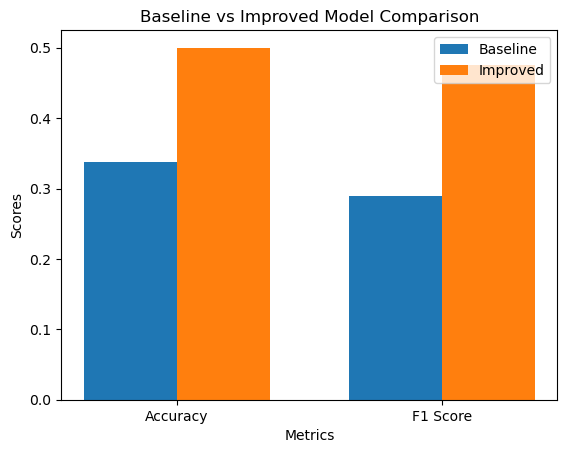

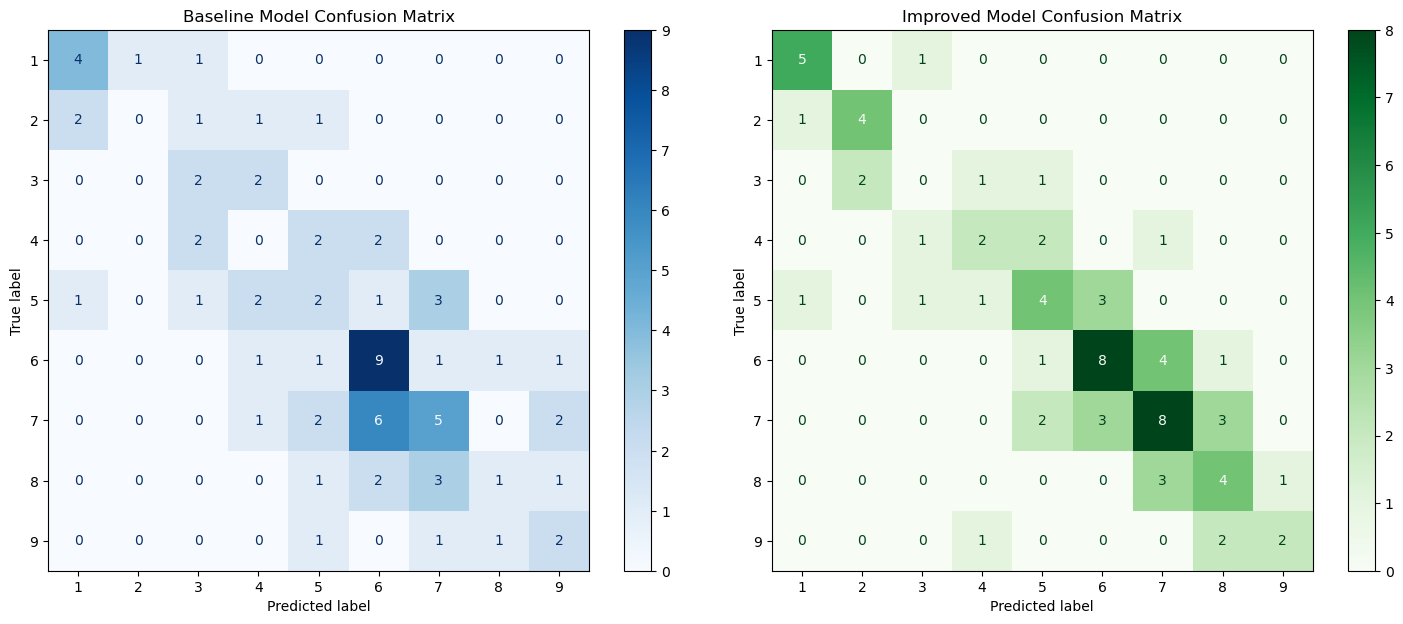

In [2]:
X_train_baseline, Y_train_baseline = load_and_prepare_data_baseline()
X_train_improved, Y_train_improved = load_and_prepare_data_yoko_ono()

baseline_acc, baseline_f1, baseline_cm, baseline_y_val = train_and_evaluate_baseline(X_train_baseline, Y_train_baseline)
improved_acc, improved_f1, improved_cm, improved_y_val = train_and_evaluate_yoko_ono(X_train_improved, Y_train_improved)

labels = ["Accuracy", "F1 Score"]
baseline_scores = [baseline_acc, baseline_f1]
improved_scores = [improved_acc, improved_f1]

plot_results(baseline_scores, improved_scores, baseline_cm, improved_cm, labels, baseline_y_val, improved_y_val)

## Results

#### Training Set Results

1. **Baseline vs. Improved Model Comparison**:
   - This bar chart compares the accuracy and F1 score of the baseline and improved models. The improved model demonstrates significantly higher scores across both metrics.

2. **Confusion Matrices**:
   - The confusion matrices highlight the classification performance of both models. The improved model achieves better precision and recall for most classes, showcasing its ability to generalize better on the training set.


### Test Set (From Challenge Server)

| Metric            | Baseline | Improved |
|--------------------|----------|----------|
| Accuracy     | 0.323	       | 0.329	       |
| F1 Score    | 0.284	       | 0.387       |


#### Discussion and Reflection
- **Challenges**:
  - Balancing interpretability and performance, as ensemble methods like Random Forests can be less transparent than Decision Trees.
- **Learnings**:
  - Preprocessing pipelines significantly improve consistency and performance.
  - The choice of features plays a critical role in capturing the complexity of musical pieces.
- **Limitations**:
  - The lack of cross-validation means that the evaluation might be sensitive to the specific training/testing split.
  - The model assumes independence of features, which may not fully capture the interplay between different musical attributes.


#### Conclusion
The improved model demonstrates the potential of ensemble methods like Random Forests in estimating piece difficulty. While the approach outperforms the baseline, further enhancements could focus on improving feature extraction and exploring deep learning models for end-to-end training. Additionally, incorporating expert feedback or user-based evaluations could refine the predictions further.